In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
MNIST Classification using Convolutional Neural Networks
=====================================================
Project: Neural Network Configuration and Environment Setup
Author: Dr. Saad Laouadi
Created: December 2024
Version: 1.0

Description:
------------
This notebook implements a CNN classifier for the MNIST dataset.
The implementation includes environment setup, model configuration,
and training pipeline.

Dependencies:
------------
- TensorFlow 2.x
- NumPy
- Matplotlib
- Seaborn

Environment:
------------
Python 3.9+
TensorFlow GPU/Metal support

Notes:
------------
This implementation includes:
- Complete environment setup
- Model configuration
- Data preprocessing
- Training pipeline
- Evaluation metrics
- Visualization tools

Last Updated: December 2024
"""

'\nMNIST Classification using Convolutional Neural Networks\n=====================================================\nProject: Neural Network Configuration and Environment Setup\nAuthor: Dr. Saad Laouadi\nCreated: December 2024\nVersion: 1.0\n\nDescription:\n------------\nThis notebook implements a CNN classifier for the MNIST dataset.\nThe implementation includes environment setup, model configuration,\nand training pipeline.\n\nDependencies:\n------------\n- TensorFlow 2.x\n- NumPy\n- Matplotlib\n- Seaborn\n\nEnvironment:\n------------\nPython 3.9+\nTensorFlow GPU/Metal support\n\nNotes:\n------------\nThis implementation includes:\n- Complete environment setup\n- Model configuration\n- Data preprocessing\n- Training pipeline\n- Evaluation metrics\n- Visualization tools\n\nLast Updated: December 2024\n'

In [2]:
# 1. System and Environment Configuration
# -------------------------------------
import os
import sys
import warnings
import logging
from datetime import datetime

# GPU Configuration
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"  # For Metal GPU

# Create custom formatter and handler for logging
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s', '%Y-%m-%d')
handler = logging.StreamHandler()
handler.setFormatter(formatter)

# Configure logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
# Clear any existing handlers to avoid duplicate logs
if logger.hasHandlers():
    logger.handlers.clear()
logger.addHandler(handler)


def setup_environment():
    """Configure system environment variables and GPU settings."""
    try:
        import tensorflow as tf
        import platform

        # Detect operating system
        system = platform.system().lower()
        
        if system == 'darwin':  # macOS
            os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"
            logger.info("MacOS detected - using Metal GPU configuration")
        elif system == 'linux':
            # Linux typically uses CUDA
            logger.info("Linux detected - using CUDA configuration")
        elif system == 'windows':
            # Windows typically uses CUDA
            logger.info("Windows detected - using CUDA configuration")

        devices = tf.config.list_physical_devices()
        gpu_devices = [device for device in devices if 'GPU' in device.device_type]
        
        if gpu_devices:
            logger.info(f"Found {len(gpu_devices)} GPU device(s)")
            for device in gpu_devices:
                try:
                    tf.config.experimental.set_memory_growth(device, True)
                except:
                    logger.warning(f"Memory growth not supported on device: {device}")
            physical_devices = True
        else:
            logger.warning("No GPU devices found - using CPU")
            physical_devices = False
            
    except Exception as e:
        logger.error(f"Error setting up environment: {str(e)}")
        physical_devices = False
    return physical_devices

# 2. Package Imports
# ----------------
try:
    # Essential packages
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Deep Learning frameworks
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    
    # Optional but useful packages
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    # Version control and reproducibility
    RANDOM_SEED = 42
    np.random.seed(RANDOM_SEED)
    tf.random.set_seed(RANDOM_SEED)
    
except ImportError as e:
    logger.error(f"Failed to import required packages: {str(e)}")
    sys.exit(1)

# 3. Configuration Settings
# ----------------------
CONFIG = {
    'random_seed': RANDOM_SEED,
    'tensorflow_version': tf.__version__,
    'numpy_version': np.__version__,
    'pandas_version': pd.__version__,
    'python_version': sys.version,
    'gpu_available': setup_environment()
}

# 4. Style Settings
# ---------------
def set_plotting_style():
    """Configure matplotlib and seaborn plotting styles."""
    plt.style.use('seaborn-v0_8-notebook')
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    plt.rcParams['lines.linewidth'] = 2

# 5. Main Setup
# -----------
def main():
    """Main setup function to initialize environment."""
    set_plotting_style()
    
    # Print environment information
    logger.info("="*72)
    logger.info("Environment Setup Complete")
    logger.info(f"Time: {datetime.now().strftime('%Y-%m-%d')}")
    logger.info(f"Python Version: {CONFIG['python_version']}")
    logger.info(f"TensorFlow Version: {CONFIG['tensorflow_version']}")
    logger.info(f"NumPy Version: {CONFIG['numpy_version']}")
    logger.info(f"Pandas Version: {CONFIG['pandas_version']}")
    logger.info(f"GPU Available: {CONFIG['gpu_available']}")
    logger.info("="*72)

# 6. Jupyter Specific Settings
# -------------------------
def jupyter_settings():
    """Configure Jupyter-specific settings."""
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            ipython.run_line_magic('reload_ext', 'watermark')
            ipython.run_line_magic('watermark', '-a "Dr. Saad Laouadi" -u -d -m')
            ipython.run_line_magic('watermark', '-iv')
    except ImportError:
        logger.warning("Not running in Jupyter environment")

if __name__ == "__main__":
    main()
    jupyter_settings()

2024-12-09 | INFO | MacOS detected - using Metal GPU configuration
2024-12-09 | INFO | Found 1 GPU device(s)
2024-12-09 | INFO | ========================================================================
2024-12-09 | INFO | Environment Setup Complete
2024-12-09 | INFO | Time: 2024-12-09
2024-12-09 | INFO | Python Version: 3.11.10 (main, Oct  3 2024, 02:26:51) [Clang 14.0.6 ]
2024-12-09 | INFO | TensorFlow Version: 2.16.2
2024-12-09 | INFO | NumPy Version: 1.26.4
2024-12-09 | INFO | Pandas Version: 2.2.2
2024-12-09 | INFO | GPU Available: True
2024-12-09 | INFO | ========================================================================


Author: Dr. Saad Laouadi

Last updated: 2024-12-09

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

numpy     : 1.26.4
seaborn   : 0.13.2
tensorflow: 2.16.2
logging   : 0.5.1.2
sklearn   : 1.5.1
sys       : 3.11.10 (main, Oct  3 2024, 02:26:51) [Clang 14.0.6 ]
keras     : 3.6.0
matplotlib: 3.9.2
pandas    : 2.2.2



In [3]:
# ======================================================================
#                       Model Configuration
# ======================================================================

# Data Parameters
DATA_CONFIG = {
    'input_shape': (28, 28, 1),    # Input dimensions (height, width, channels)
    'num_classes': 10,             # Number of output classes
    'val_split': 0.2,              # Validation split ratio
    'test_split': 0.1              # Test split ratio
}

# Model Architecture Parameters
MODEL_CONFIG = {
    'conv_layers': [32, 64],       # Number of filters in each conv layer
    'dense_layers': [128, 64],     # Number of units in each dense layer
    'kernel_size': (3, 3),         # Conv kernel size
    'pool_size': (2, 2),           # MaxPooling size
    'activation': 'relu',          # Default activation function
    'final_activation': 'softmax', # Output layer activation
    'dropout_rate': 0.3            # Dropout rate
}

# Training Parameters
TRAIN_CONFIG = {
    'batch_size': 128,             # Batch size for training
    'epochs': 15,                  # Number of epochs
    'learning_rate': 0.001,        # Initial learning rate
    'optimizer': 'adam',           # Optimizer choice
    'loss': 'categorical_crossentropy', # Loss function
    'metrics': ['accuracy']        # Metrics to track
}

# Data Augmentation Parameters
AUGMENT_CONFIG = {
    'rotation_range': 10,          # Rotation range (degrees)
    'width_shift_range': 0.1,      # Width shift range
    'height_shift_range': 0.1,     # Height shift range
    'zoom_range': 0.1,             # Zoom range
    'horizontal_flip': False,      # Horizontal flip
    'vertical_flip': False         # Vertical flip
}

# Callback Parameters
CALLBACK_CONFIG = {
    'early_stopping': {
        'monitor': 'val_loss',
        'patience': 5,
        'restore_best_weights': True
    },
    'reduce_lr': {
        'monitor': 'val_loss',
        'factor': 0.2,
        'patience': 3,
        'min_lr': 1e-6
    },
    'model_checkpoint': {
        'monitor': 'val_loss',
        'save_best_only': True
    }
}

# Path Configuration
PATH_CONFIG = {
    'data_dir': './data',          # Data directory
    'model_dir': './models',       # Model saving directory
    'log_dir': './logs',           # Logging directory
    'fig_dir': './figures'         # Figures saving directory
}

# Create necessary directories
for directory in PATH_CONFIG.values():
    os.makedirs(directory, exist_ok=True)

# Random Seed for Reproducibility
RANDOM_SEED = 42

# Device Configuration
DEVICE_CONFIG = {
    'use_gpu': True,               # Whether to use GPU
    'mixed_precision': True,       # Whether to use mixed precision training
    'multi_gpu': False             # Whether to use multiple GPUs
}

# Logging Configuration
LOG_CONFIG = {
    'log_to_file': False,           # Whether to save logs to file
    'verbose': 1,                  # Verbosity mode
    'log_frequency': 'epoch'       # Logging frequency ('batch' or 'epoch')
}

2024-12-09 | INFO | Loading and preprocessing data...
2024-12-09 | INFO | Training samples: 60000
2024-12-09 | INFO | Test samples: 10000
2024-12-09 | INFO | Input shape: (28, 28, 1)
2024-12-09 | INFO | Building model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

2024-12-09 | INFO | Starting model training...


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7858 - loss: 0.7273 - val_accuracy: 0.9737 - val_loss: 0.0949 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9660 - loss: 0.1112 - val_accuracy: 0.9799 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9747 - loss: 0.0798 - val_accuracy: 0.9833 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9803 - loss: 0.0633 - val_accuracy: 0.9855 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9829 - loss: 0.0559 - val_accuracy: 0.9867 - val_loss: 0.0490 - learning_rate: 0.0010
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9848 - loss: 0.0466 - val_accuracy: 0.9872 - val_loss: 0.0430 - learning_rate: 0.0010
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9873 - loss: 0.

2024-12-09 | INFO | Evaluating model...


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


2024-12-09 | INFO | Test loss: 0.0265
2024-12-09 | INFO | Test accuracy: 0.9917


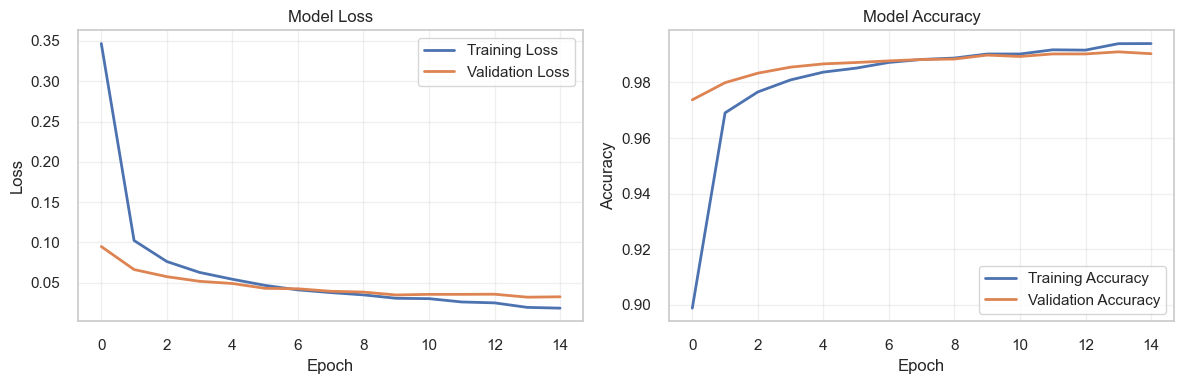

In [4]:
# ======================================================================
#                            MNIST Classifier
# ======================================================================

def load_and_preprocess_data():
    """
    Load and preprocess MNIST dataset.
    Returns preprocessed training and test sets.
    """
    logger.info("Loading and preprocessing data...")
    try:
        # Load data
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
        
        # Preprocess features
        x_train = x_train.astype("float32") / 255
        x_test = x_test.astype("float32") / 255
        
        # Reshape to match input shape
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)
        
        # Convert labels to categorical
        y_train = keras.utils.to_categorical(y_train, DATA_CONFIG['num_classes'])
        y_test = keras.utils.to_categorical(y_test, DATA_CONFIG['num_classes'])
        
        logger.info(f"Training samples: {x_train.shape[0]}")
        logger.info(f"Test samples: {x_test.shape[0]}")
        logger.info(f"Input shape: {x_train.shape[1:]}")
        
        return (x_train, y_train), (x_test, y_test)
    
    except Exception as e:
        logger.error(f"Error in data preprocessing: {str(e)}")
        raise


def build_model():
    """
    Create and compile the model architecture.
    Returns compiled model.
    """
    logger.info("Building model...")
    try:
        model = keras.Sequential([
            keras.Input(shape=DATA_CONFIG['input_shape']),
            # First Convolutional Block
            layers.Conv2D(
                MODEL_CONFIG['conv_layers'][0],
                kernel_size=MODEL_CONFIG['kernel_size'],
                activation=MODEL_CONFIG['activation']
            ),
            layers.MaxPooling2D(pool_size=MODEL_CONFIG['pool_size']),
            
            # Second Convolutional Block
            layers.Conv2D(
                MODEL_CONFIG['conv_layers'][1],
                kernel_size=MODEL_CONFIG['kernel_size'],
                activation=MODEL_CONFIG['activation']
            ),
            layers.MaxPooling2D(pool_size=MODEL_CONFIG['pool_size']),
            
            # Flatten and Dense Layers
            layers.Flatten(),
            layers.Dropout(MODEL_CONFIG['dropout_rate']),
            layers.Dense(
                DATA_CONFIG['num_classes'],
                activation=MODEL_CONFIG['final_activation']
            ),
        ])
        
        # Compile model
        model.compile(
            loss=TRAIN_CONFIG['loss'],
            optimizer=TRAIN_CONFIG['optimizer'],
            metrics=TRAIN_CONFIG['metrics']
        )
        
        model.summary()
        return model
    
    except Exception as e:
        logger.error(f"Error in model building: {str(e)}")
        raise


def setup_callbacks():
    """
    Create training callbacks.
    Returns list of callbacks.
    """
    callbacks = []
    
    # Early Stopping
    callbacks.append(keras.callbacks.EarlyStopping(
        **CALLBACK_CONFIG['early_stopping']
    ))
    
    # Learning Rate Reduction
    callbacks.append(keras.callbacks.ReduceLROnPlateau(
        **CALLBACK_CONFIG['reduce_lr']
    ))
    
    # Model Checkpoint
    callbacks.append(keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(PATH_CONFIG['model_dir'], 'best_model.keras'),
        **CALLBACK_CONFIG['model_checkpoint']
    ))
    
    return callbacks


def train_model(model, x_train, y_train):
    """
    Train the model with the specified configuration.
    Returns training history.
    """
    logger.info("Starting model training...")
    try:
        # Setup callbacks
        callbacks = setup_callbacks()
        
        # Train model
        history = model.fit(
            x_train, y_train,
            batch_size=TRAIN_CONFIG['batch_size'],
            epochs=TRAIN_CONFIG['epochs'],
            validation_split=DATA_CONFIG['val_split'],
            callbacks=callbacks,
            verbose=LOG_CONFIG['verbose']
        )
        
        return history
    
    except Exception as e:
        logger.error(f"Error in model training: {str(e)}")
        raise


def evaluate_model(model, x_test, y_test):
    """
    Evaluate the trained model.
    Returns test metrics.
    """
    logger.info("Evaluating model...")
    try:
        test_loss, test_accuracy = model.evaluate(
            x_test, y_test,
            verbose=0
        )
        
        logger.info(f"Test loss: {test_loss:.4f}")
        logger.info(f"Test accuracy: {test_accuracy:.4f}")
        
        return test_loss, test_accuracy
    
    except Exception as e:
        logger.error(f"Error in model evaluation: {str(e)}")
        raise


def plot_training_history(history):
    """
    Plot training history.
    """
    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Plot loss
        ax1.plot(history.history['loss'], label='Training Loss')
        ax1.plot(history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        
        # Plot accuracy
        ax2.plot(history.history['accuracy'], label='Training Accuracy')
        ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig(os.path.join(PATH_CONFIG['fig_dir'], 'training_history.png'))
        plt.show()
        
    except Exception as e:
        logger.error(f"Error in plotting: {str(e)}")
        raise


def main():
    """
    Main execution function.
    """
    try:
        # Set random seeds for reproducibility
        tf.random.set_seed(RANDOM_SEED)
        np.random.seed(RANDOM_SEED)
        
        # Load and preprocess data
        (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
        
        # Build model
        model = build_model()
        
        # Train model
        history = train_model(model, x_train, y_train)
        print(history.history.keys())
        
        # Evaluate model
        test_metrics = evaluate_model(model, x_test, y_test)
        
        # Plot training history
        plot_training_history(history)
        
        # Save final model
        model.save(os.path.join(PATH_CONFIG['model_dir'], 'final_model.keras'))
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise


if __name__ == "__main__":
    main()